<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.12
Notebook id          : GRAD1
Run time             : Tuesday 09 February 2021, 18:31:34
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Tuesday 09 February 2021, 18:31:34


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


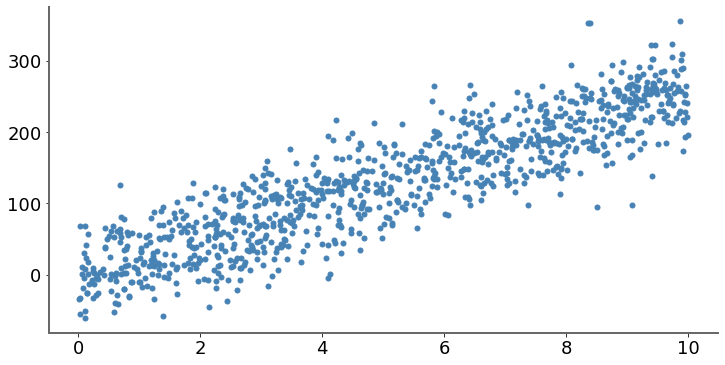

X                :      mean=   4.998  std=   2.887    min=   0.000    max=  10.000
Y                :      mean= 128.936  std=  84.583    min=-163.857    max= 417.710


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   4.998  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=  -0.000  std=   1.000    min=  -1.731    max=   1.733


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +12.983   -6.923  -1.775   -3.392  +0.018


   20   +5.904   -4.622  -1.185   -2.265  +0.307


   40   +2.749   -3.086  -0.791   -1.512  +0.500


   60   +1.343   -2.060  -0.528   -1.009  +0.629


   80   +0.717   -1.375  -0.353   -0.674  +0.715


  100   +0.437   -0.918  -0.235   -0.450  +0.772


  120   +0.313   -0.613  -0.157   -0.300  +0.810


  140   +0.257   -0.409  -0.105   -0.201  +0.836


  160   +0.233   -0.273  -0.070   -0.134  +0.853


  180   +0.222   -0.182  -0.047   -0.089  +0.864


  200   +0.217   -0.122  -0.031   -0.060  +0.872


<br>**Visualization :**

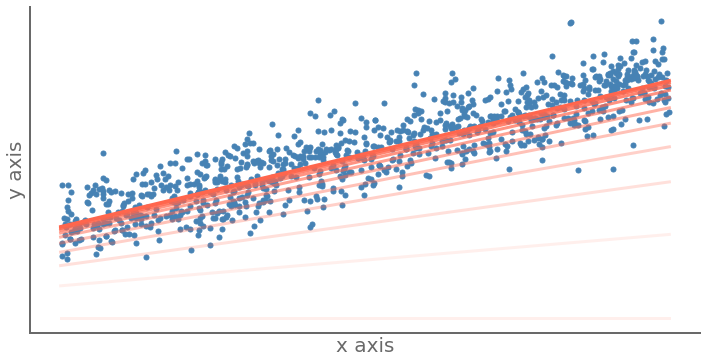

<br>**Loss :**

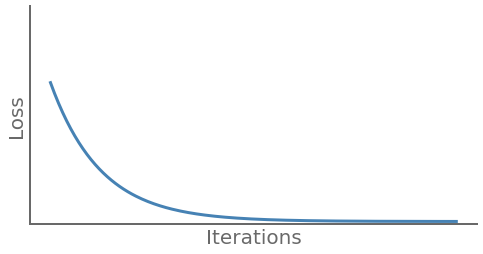

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.180   -1.649  -4.160   -0.142  +0.862
    1   +0.219   +1.911  +2.071   -0.012  +0.817
    2   +0.168   +2.060  -4.079   -0.010  +0.873
    3   +0.373   -3.292  +2.483   -0.004  +0.921
    4   +0.188   -2.870  +1.812   -0.013  +0.926
    5   +0.243   -2.119  +1.585   -0.008  +0.912
    6   +0.128   +5.344  +0.937   -0.037  +0.890
    7   +0.300   -4.227  -3.548   -0.023  +0.912
    8   +0.295   -5.625  +0.484   -0.008  +0.903
    9   +0.106   -1.495  +3.015   -0.017  +0.897


<br>**Visualization :**

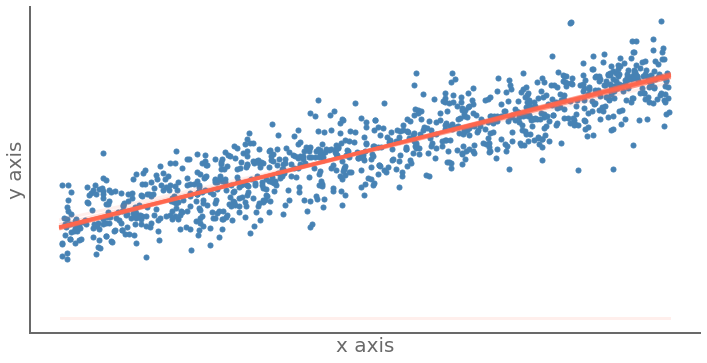

<br>**Loss :**

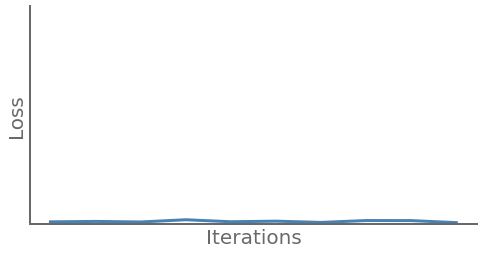

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Tuesday 09 February 2021, 18:31:39
Duration is : 00:00:05 425ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>